In [2]:
df:pd.DataFrame = pd.read_csv("./data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df = df.drop(["CustomerID"], axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


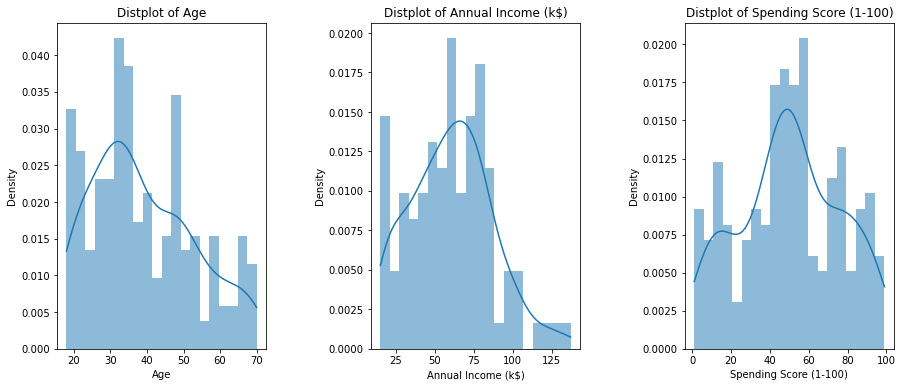

In [6]:
plt.figure(1, figsize=(15, 6))
cols = ["Age","Annual Income (k$)","Spending Score (1-100)"]
for i in range(len(cols)):
    col = cols[i]
    plt.subplot(1,3,i+1)
    plt.subplots_adjust(hspace=-0.5,wspace=0.5)
    ax = sns.histplot(df[col],bins=20, kde=True, stat="density", linewidth=0)
    plt.title(f"Distplot of {col}")
plt.show()

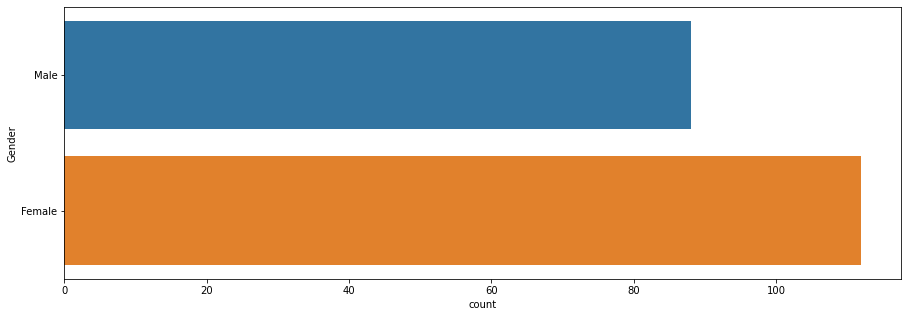

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(y="Gender",data=df)
plt.show()

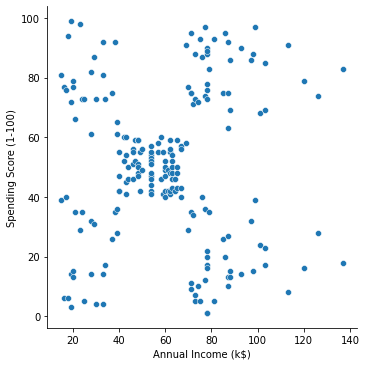

In [9]:
sns.relplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df)


In [13]:
def plotClusters(X, K, R, soft=True):
    
    if soft:
        random_colors = np.random.random((K, 3))
        colors = R.dot(random_colors)
    else:
        colors = np.argmax(R,axis=1)
    plt.scatter(X[:,0], X[:,1], c=colors)
    plt.show()

In [22]:
# Age	Annual Income (k$)	Spending Score (1-100)
X = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].to_numpy()

spherical 1
spherical 3
spherical 4
tied 4
full 4


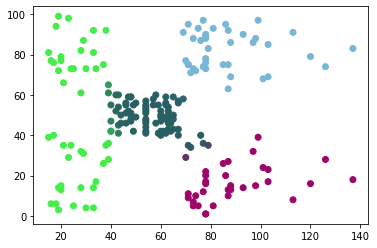

In [23]:
from sklearn.mixture import GaussianMixture

lowest_bic = np.infty
bic = []
n_components_range = range(1, 5)
cv_types = ['spherical', 'tied', 'diag', 'full']
 
best_gmm = None
for cv_type in cv_types:
   for n_components in n_components_range:
       gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
       gmm.fit(X)
       bic.append(gmm.aic(X))
      
       if bic[-1] < lowest_bic:
           lowest_bic = bic[-1]
           best_gmm = gmm
           print(cv_type,n_components)


best_gmm.fit(X)
 
R = best_gmm.predict_proba(X)
plotClusters(X, best_gmm.n_components, R)


Centroids:  [[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


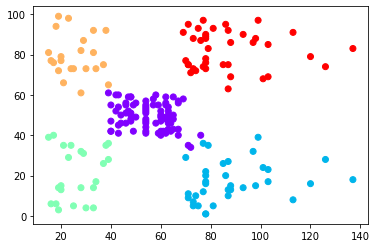

In [24]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)
model.fit(X)
print("Centroids: ", model.cluster_centers_)
R = model.predict(X)
plt.scatter(X[:,0],X[:,1],c=R,cmap="rainbow")


In [ ]:
# Age	Annual Income (k$)	Spending Score (1-100)
X1 = df.loc[:, ["Age","Annual Income (k$)", "Spending Score (1-100)"]].to_numpy()

In [30]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 5)
cv_types = ['spherical', 'tied', 'diag', 'full']

best_option = ""

best_gmm = None
for cv_type in cv_types:
   for n_components in n_components_range:
       gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
       gmm.fit(X1)
       bic.append(gmm.aic(X1))
      
       if bic[-1] < lowest_bic:
           lowest_bic = bic[-1]
           best_gmm = gmm
           best_option = f"{cv_type}-{n_components}"


best_gmm.fit(X1)
 
R1 = best_gmm.predict_proba(X1)
print(best_option)
print(np.argmax(R1, axis=1))


full-4
[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 1 0 0 0 1 1 1 1 0 1 1 2 0 2 3 2 3 2 3 2 0 2 3 2 3 2 3 2 3 2 0 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [31]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)
model.fit(X1)
print("Centroids: ", model.cluster_centers_)
print(model.predict(X1))


Centroids:  [[43.08860759 55.29113924 49.56962025]
 [45.2173913  26.30434783 20.91304348]
 [32.69230769 86.53846154 82.12820513]
 [40.66666667 87.75       17.58333333]
 [25.52173913 26.30434783 78.56521739]]
[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 3 2 0 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 0 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]
